# DESIGN ANALYSIS & ALGORITHM

# lab assignment

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage


def profile_function(func, *args, **kwargs):
    start_time = time.time()
    mem_usage = memory_usage((func, args, kwargs), max_iterations=1)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    max_memory = max(mem_usage) - min(mem_usage)
    
    return elapsed_time, max_memory


In [10]:
def profile_function(func, *args, **kwargs):
    start_time = time.time()
    mem_usage = memory_usage((func, args, kwargs), max_iterations=1)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    max_memory = max(mem_usage) - min(mem_usage)
    
    return elapsed_time, max_memory


# Fibonacci naïve recursive 

> input = 29

> output = 514229

>time complexity = T(n)=O(2n)

>Best, Average, Worst Case Time Complexity: O(2^n) (all the same here)

>Space Complexity: O(n) 


In [11]:
def fibonacci_recursive(n):
    """Naïve recursive Fibonacci implementation (very slow for large n)."""
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# input 
n = int(input("Enter a number for Fibonacci (recursive): "))
print(f"Fib({n}) = {fibonacci_recursive(n)}")


Fib(29) = 514229


Plot execution time vs. input size using matplotlib. 

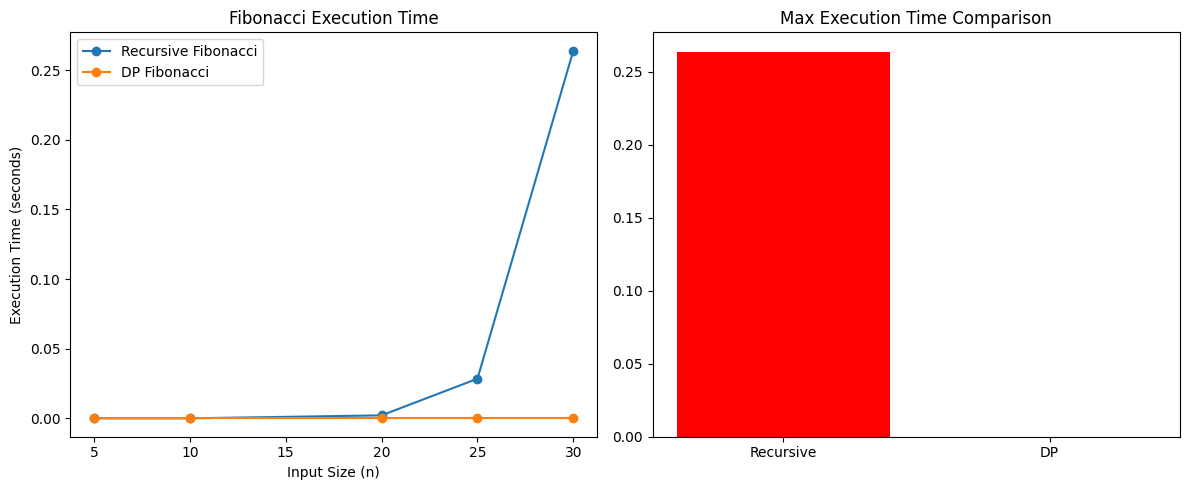

In [8]:
import time
import matplotlib.pyplot as plt

# Naïve recursive Fibonacci
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# DP (memoized) Fibonacci
def fibonacci_dp(n):
    fib = [0, 1]
    for i in range(2, n+1):
        fib.append(fib[i-1] + fib[i-2])
    return fib[n]

# Test input sizes
input_sizes = [5, 10, 20, 25, 30]  # keep small for recursive
recursive_times = []
dp_times = []

# Measure recursive performance
for n in input_sizes:
    start = time.time()
    fibonacci_recursive(n)
    end = time.time()
    recursive_times.append(end - start)

# Measure DP performance
for n in input_sizes:
    start = time.time()
    fibonacci_dp(n)
    end = time.time()
    dp_times.append(end - start)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(input_sizes, recursive_times, marker='o', label="Recursive Fibonacci")
plt.plot(input_sizes, dp_times, marker='o', label="DP Fibonacci")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Fibonacci Execution Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(["Recursive", "DP"], [max(recursive_times), max(dp_times)], color=['red', 'green'])
plt.title("Max Execution Time Comparison")

plt.tight_layout()
plt.show()


# Dynamic Programming Fibonacci with Input

> input = 98

> output = 135301852344706746049

>time complexity = O(n)

>Best, Average, Worst Case Time Complexity: O(n)

>Space Complexity: O(n) 



In [9]:
def fibonacci_dp(n):
    """Dynamic programming Fibonacci implementation."""
    if n <= 1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]

# Take input from user
n = int(input("Enter a number for Fibonacci (DP): "))
print(f"Fib({n}) = {fibonacci_dp(n)}")


Fib(98) = 135301852344706746049


Plot execution time vs. input size using matplotlib. 

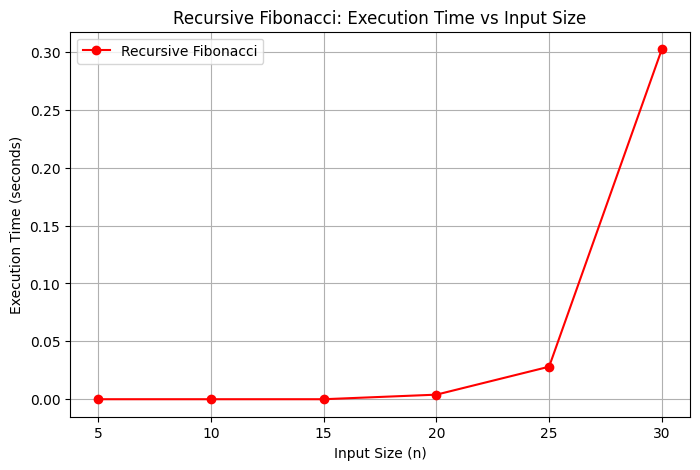

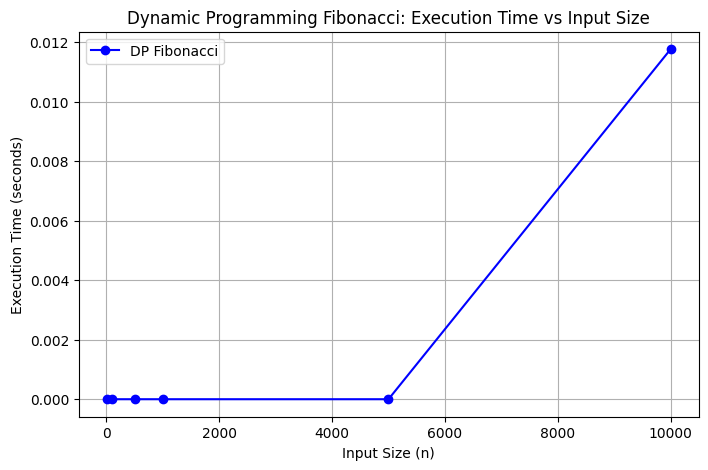

In [ ]:
import time
import matplotlib.pyplot as plt

# Recursive Fibonacci 
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# DP Fibonacci 
def fibonacci_dp(n):
    if n <= 1:
        return n
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]

# Input sizes
recursive_sizes = [5, 10, 15, 20, 25, 30]   
dp_sizes = [10, 100, 500, 1000, 5000, 10000] 

recursive_times = []
dp_times = []

# Measure Recursive
for n in recursive_sizes:
    start = time.time()
    fibonacci_recursive(n)
    end = time.time()
    recursive_times.append(end - start)

# Measure DP
for n in dp_sizes:
    start = time.time()
    fibonacci_dp(n)
    end = time.time()
    dp_times.append(end - start)

# Plot Recursive 
plt.figure(figsize=(8,5))
plt.plot(recursive_sizes, recursive_times, marker='o', color='red', label="Recursive Fibonacci")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Recursive Fibonacci: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()

# Plot DP 
plt.figure(figsize=(8,5))
plt.plot(dp_sizes, dp_times, marker='o', color='blue', label="DP Fibonacci")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dynamic Programming Fibonacci: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


# Quick Sort

Best / Avg Time: O(n log n)

Worst Time: O(n^2) (bad pivot selection)

Space: O(log n) due to recursion

Trade-off: Fast on average, but recursive depth can cause stack overflow if array is very large.

In [14]:
# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Merge Sort

Time: Always O(n log n)

Space: O(n) (extra arrays for merging)

Trade-off: Stable sorting, predictable performance, but uses more memory.

In [15]:
# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    
    result.extend(left[i:])
    result.extend(right[j:])
    return result

Input sizes for sorting experiments Merge sort & quick sort



In [ ]:
input_sizes = [100, 500, 1000, 2000, 5000]

quick_times, merge_times = [], []
quick_memory, merge_memory = [], []

for n in input_sizes:
    test_data = np.random.randint(0, 10000, n).tolist()

    # Quick Sort
    t, m = profile_function(quick_sort, test_data.copy())
    quick_times.append(t)
    quick_memory.append(m)

    # Merge Sort
    t, m = profile_function(merge_sort, test_data.copy())
    merge_times.append(t)
    merge_memory.append(m)


Plot execution time vs. input size using matplotlib.  Merge sort & quick sort

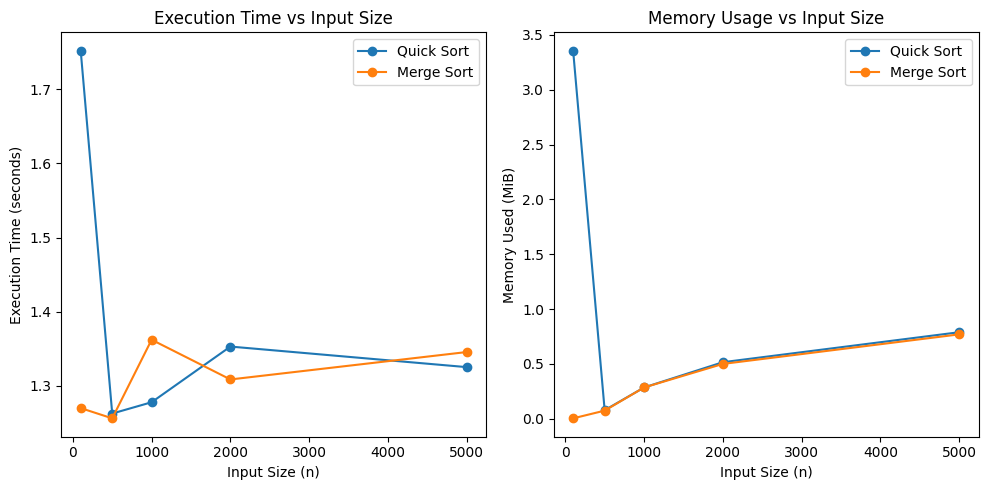

In [17]:
plt.figure(figsize=(10, 5))

# Execution Time
plt.subplot(1, 2, 1)
plt.plot(input_sizes, quick_times, marker='o', label="Quick Sort")
plt.plot(input_sizes, merge_times, marker='o', label="Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Input Size")
plt.legend()

# Memory Usage
plt.subplot(1, 2, 2)
plt.plot(input_sizes, quick_memory, marker='o', label="Quick Sort")
plt.plot(input_sizes, merge_memory, marker='o', label="Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Memory Used (MiB)")
plt.title("Memory Usage vs Input Size")
plt.legend()

plt.tight_layout()
plt.show()


# Insertion Sort Implementation

Input / Output

Input: A list/array of numbers.
Example: [5, 2, 4, 6, 1, 3]

Output: The sorted list.
Example: [1, 2, 3, 4, 5, 6]

Time Complexity Best case: O(n) 

Average case: O(n²) 

Worst case: O(n²) 

Space Complexity: O(1) (in-place, no extra memory).

In [19]:
def insertion_sort(arr):
    """Insertion Sort implementation"""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr


Experimental Profiling & Visualization

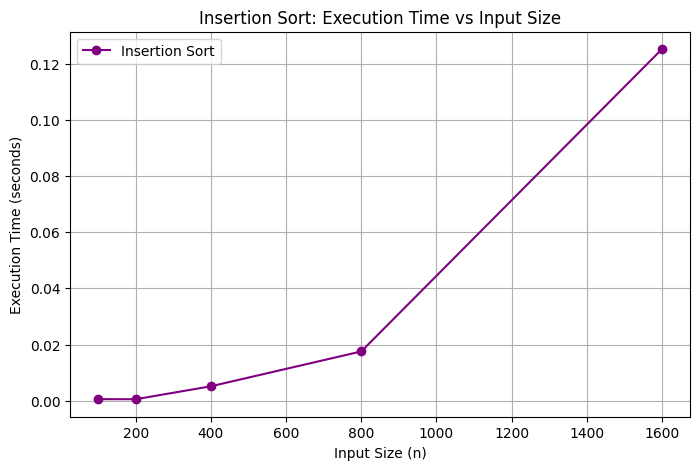

In [20]:
import random
import time
import matplotlib.pyplot as plt

# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Test input sizes
input_sizes = [100, 200, 400, 800, 1600]
execution_times = []

for n in input_sizes:
    arr = [random.randint(0, 10000) for _ in range(n)]  # random list
    start = time.time()
    insertion_sort(arr)
    end = time.time()
    execution_times.append(end - start)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(input_sizes, execution_times, marker='o', color='purple', label="Insertion Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Insertion Sort: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


# Bubble Sort

Input: A list/array of numbers.
Example: [64, 34, 25, 12, 22, 11, 90]

Output: Sorted list.
Example: [11, 12, 22, 25, 34, 64, 90]

Time Complexity

Best case: O(n) → already sorted (optimized version with swapped flag).

Average case: O(n²)

Worst case: O(n²) → reverse-sorted input.

Space Complexity: O(1) → sorts in-place.




In [ ]:
def bubble_sort(arr):
    """Bubble Sort implementation"""
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr


 Experimental Profiling & Visualization

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# Test input sizes
input_sizes = [100, 200, 400, 800]
execution_times = []

for n in input_sizes:
    arr = [random.randint(0, 10000) for _ in range(n)]  # random list
    start = time.time()
    bubble_sort(arr)
    end = time.time()
    execution_times.append(end - start)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(input_sizes, execution_times, marker='o', color='red', label="Bubble Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Bubble Sort: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


# Selection Sort

Input: A list/array of numbers.
Example: [64, 25, 12, 22, 11]

Output: Sorted list.
Example: [11, 12, 22, 25, 64]

Time Complexity

Best case: O(n²)

Average case: O(n²)

Worst case: O(n²)

Space Complexity: O(1)

Suitability and Trade-offs

 Very simple and easy to implement.
 Performs well on small datasets.
 Minimum number of swaps compared to Bubble/Insertion Sort.
 Always O(n²) comparisons → inefficient for large inputs.
 Not stable (equal elements might get reordered).



In [ ]:
def selection_sort(arr):
    """Selection Sort implementation"""
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr


 Experimental Profiling & Visualization

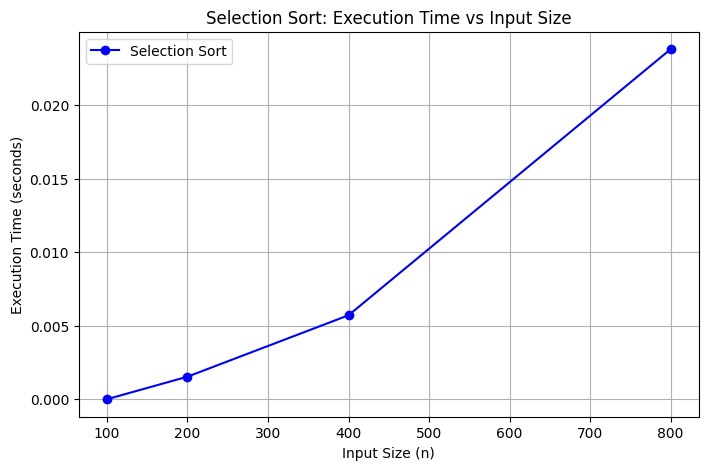

In [21]:
import random
import time
import matplotlib.pyplot as plt

# Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

# Test input sizes
input_sizes = [100, 200, 400, 800]
execution_times = []

for n in input_sizes:
    arr = [random.randint(0, 10000) for _ in range(n)]  # random list
    start = time.time()
    selection_sort(arr)
    end = time.time()
    execution_times.append(end - start)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(input_sizes, execution_times, marker='o', color='blue', label="Selection Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Selection Sort: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


# Binary Search

Time Complexity

Best case: O(1) → if middle element is the target.

Average case: O(log n)

Worst case: O(log n)

Space Usage

Iterative version: O(1)

Recursive version: O(log n) (stack frames).



In [23]:
def binary_search(arr, target):
    """Binary Search implementation (iterative)"""
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid   # return index if found
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1  # not found


Input:

A sorted list arr

A target value target

Output:

Index of the element if found, otherwise -1.

In [ ]:
arr = [1, 3, 5, 7, 9, 11]
print(binary_search(arr, 7))   
print(binary_search(arr, 4))   


3
-1


 Experimental Profiling & Visualization

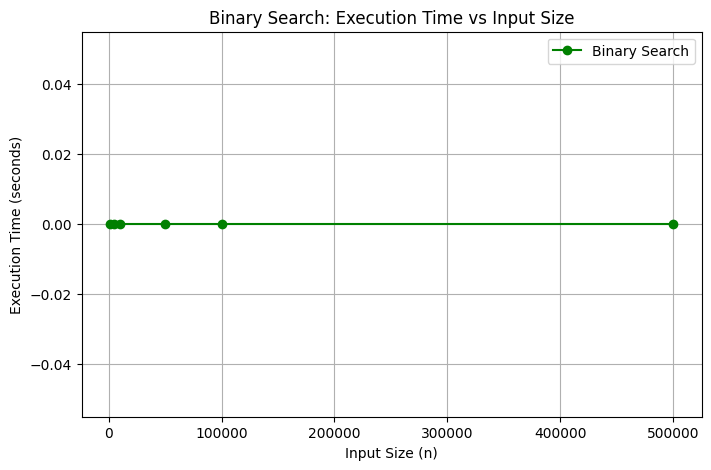

In [22]:
import random
import time
import matplotlib.pyplot as plt

# Binary Search
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Test input sizes
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000]
execution_times = []

for n in input_sizes:
    arr = sorted(random.sample(range(n*10), n))  # sorted array
    target = random.choice(arr)                  # pick random element
    start = time.time()
    binary_search(arr, target)
    end = time.time()
    execution_times.append(end - start)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(input_sizes, execution_times, marker='o', color='green', label="Binary Search")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Binary Search: Execution Time vs Input Size")
plt.legend()
plt.grid(True)
plt.show()


| Algorithm          | Type      | Best Case  | Average Case | Worst Case | Space Complexity | Stable? | Notes                                         |
| ------------------ | --------- | ---------- | ------------ | ---------- | ---------------- | ------- | --------------------------------------------- |
| **Bubble Sort**    | Sorting   | O(n)       | O(n²)        | O(n²)      | O(1)             | ✅ Yes   | Adjacent swap, simple but slow                |
| **Selection Sort** | Sorting   | O(n²)      | O(n²)        | O(n²)      | O(1)             | ❌ No    | Always quadratic, easy to implement           |
| **Insertion Sort** | Sorting   | O(n)       | O(n²)        | O(n²)      | O(1)             | ✅ Yes   | Good for small/partially sorted data          |
| **Merge Sort**     | Sorting   | O(n log n) | O(n log n)   | O(n log n) | O(n)             | ✅ Yes   | Divide & Conquer, stable but uses extra space |
| **Quick Sort**     | Sorting   | O(n log n) | O(n log n)   | O(n²)      | O(log n) (avg)   | ❌ No    | Very fast in practice, but worst case bad     |
| **Linear Search**  | Searching | O(1)       | O(n)         | O(n)       | O(1)             | ✅ Yes   | Works on unsorted arrays                      |
| **Binary Search**  | Searching | O(1)       | O(log n)     | O(log n)   | O(1)             | ✅ Yes   | Needs sorted array, very efficient            |
